In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
import random
random.seed(100)
emoData_365 = []
for i in range(365):
    y = (5/365)*i + random.random()
    emoData_365.append(y)
emoData_365 = np.array(emoData_365)[:,None]
# print(bioData_365)
# print(len(bioData_365))

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
emoData_365 = scaler.fit_transform(emoData_365)
#print(bioData_365)

In [4]:
look_back = 40
train_marker = int(0.6*len(emoData_365))
val_marker = int(0.8*len(emoData_365))

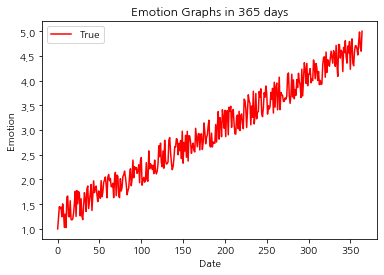

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.clf()
plt.title("Emotion Graphs in 365 days")
plt.xlabel("Date")
plt.ylabel("Emotion")
#plot_x = np.arange(200)
plot_y = emoData_365
plt.plot(plot_y, color="red", label="True")
plt.legend(loc='best')
plt.show()

In [6]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
train = emoData_365[:train_marker]
val = emoData_365[train_marker:val_marker]
test = emoData_365[val_marker:]

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

In [9]:
model = Sequential()
model.add(Dense(32,input_dim=40,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))

In [10]:
model.compile(loss='mean_squared_error', optimizer='adagrad')

In [11]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

Train on 179 samples, validate on 33 samples
Epoch 1/200
179/179 [==============================] - 0s 2ms/step - loss: 3.8455 - val_loss: 1.7802
Epoch 2/200
179/179 [==============================] - 0s 78us/step - loss: 1.5383 - val_loss: 1.8242
Epoch 3/200
179/179 [==============================] - 0s 72us/step - loss: 1.1409 - val_loss: 0.7978
Epoch 4/200
179/179 [==============================] - 0s 84us/step - loss: 1.2609 - val_loss: 1.2427
Epoch 5/200
179/179 [==============================] - 0s 89us/step - loss: 1.0055 - val_loss: 2.3616
Epoch 6/200
179/179 [==============================] - 0s 95us/step - loss: 0.8129 - val_loss: 1.9207
Epoch 7/200
179/179 [==============================] - 0s 84us/step - loss: 0.8053 - val_loss: 1.7580
Epoch 8/200
179/179 [==============================] - 0s 95us/step - loss: 0.7129 - val_loss: 2.0518
Epoch 9/200
179/179 [==============================] - 0s 84us/step - loss: 0.6848 - val_loss: 2.0716
Epoch 10/200
179/179 [================

179/179 [==============================] - 0s 100us/step - loss: 0.3798 - val_loss: 1.7949
Epoch 81/200
179/179 [==============================] - 0s 78us/step - loss: 0.4261 - val_loss: 2.2214
Epoch 82/200
179/179 [==============================] - 0s 89us/step - loss: 0.4189 - val_loss: 2.0485
Epoch 83/200
179/179 [==============================] - 0s 72us/step - loss: 0.4117 - val_loss: 2.0789
Epoch 84/200
179/179 [==============================] - 0s 83us/step - loss: 0.3958 - val_loss: 2.2288
Epoch 85/200
179/179 [==============================] - 0s 72us/step - loss: 0.3678 - val_loss: 2.1951
Epoch 86/200
179/179 [==============================] - 0s 78us/step - loss: 0.3920 - val_loss: 2.3646
Epoch 87/200
179/179 [==============================] - 0s 73us/step - loss: 0.3680 - val_loss: 1.9474
Epoch 88/200
179/179 [==============================] - 0s 67us/step - loss: 0.4178 - val_loss: 2.3206
Epoch 89/200
179/179 [==============================] - 0s 67us/step - loss: 0.3578 -

Epoch 159/200
179/179 [==============================] - 0s 72us/step - loss: 0.3258 - val_loss: 1.8122
Epoch 160/200
179/179 [==============================] - 0s 67us/step - loss: 0.4332 - val_loss: 1.7338
Epoch 161/200
179/179 [==============================] - 0s 72us/step - loss: 0.3592 - val_loss: 1.9108
Epoch 162/200
179/179 [==============================] - 0s 72us/step - loss: 0.3751 - val_loss: 2.1276
Epoch 163/200
179/179 [==============================] - 0s 61us/step - loss: 0.3439 - val_loss: 1.9855
Epoch 164/200
179/179 [==============================] - 0s 67us/step - loss: 0.4045 - val_loss: 2.1145
Epoch 165/200
179/179 [==============================] - 0s 72us/step - loss: 0.3818 - val_loss: 1.9958
Epoch 166/200
179/179 [==============================] - 0s 72us/step - loss: 0.3118 - val_loss: 1.9349
Epoch 167/200
179/179 [==============================] - 0s 89us/step - loss: 0.3220 - val_loss: 1.9993
Epoch 168/200
179/179 [==============================] - 0s 72us

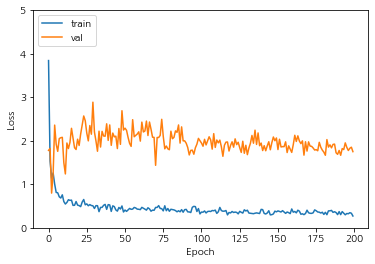

In [12]:
plt.clf()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 5.0)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Train Score:  0.4153186529042335
Validataion Score:  1.7515074159159805
Test Score:  3.1880197669520522


In [14]:
look_ahead = 30
xhat = x_test[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=32)
    predictions[i] = prediction
    xhat = np.hstack([xhat[:,1:],prediction])

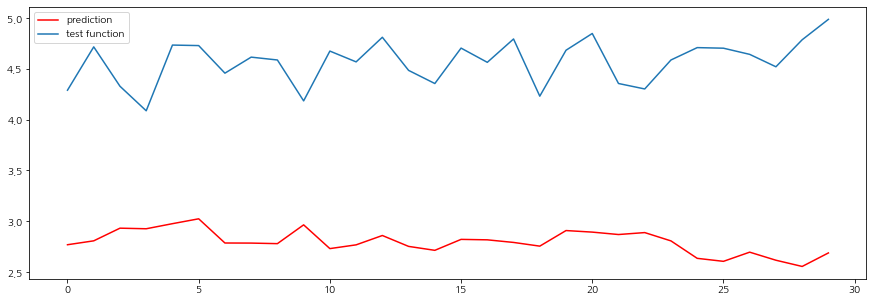

In [15]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(look_ahead), predictions, 'r' ,label="prediction")
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label="test function")
plt.legend()
plt.show()